In [17]:
import pandas as pd;
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np;
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [18]:
def mse(imageA, imageB):
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

def compare_images(imageA, imageB, title):
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s),color='red')
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	plt.show()

def center_crop(img, dim):
	width, height = img.shape[1], img.shape[0]

	crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
	crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0]
	mid_x, mid_y = int(width/2), int(height/2)
	cw2, ch2 = int(crop_width/2), int(crop_height/2)
	crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
	return crop_img

In [20]:
original = cv2.imread("img/test12.jpg")
story = cv2.imread("img/test01.jpg")

h1,w1,c1 = original.shape
h2,w2,c2 = story.shape
h = min(h1,h2)
w = min(w1,w2)
story_center = center_crop(story,(w,h))
original_center = center_crop(original,(w,h))
story_center.shape
original_center.shape

(738, 540, 3)

In [21]:
# convert the images to grayscale
story_1 = cv2.resize(story, (w,h))

original_center = cv2.cvtColor(original_center, cv2.COLOR_BGR2GRAY)
story_center = cv2.cvtColor(story_center, cv2.COLOR_BGR2GRAY)

original_center.shape
story_center.shape

(738, 540)

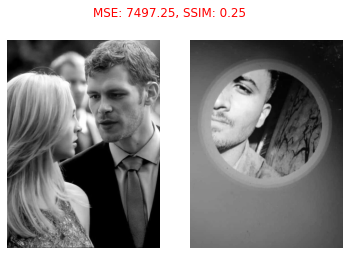

In [22]:
compare_images(original_center, story_center, "Original vs. story")

In [6]:
(score, diff) = ssim(original_center, story_center, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

np.sum(np.absolute(original_center - story_center)) / (h*w) / 255

SSIM: 0.8416856456192967


0.4425029162865589

In [7]:
orb = cv2.ORB_create()
kp_a, desc_a = orb.detectAndCompute(original, None)
kp_b, desc_b = orb.detectAndCompute(story_1, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(desc_a, desc_b)
similar_regions = [i for i in matches if i.distance < 70]
len(similar_regions) / len(matches)

0.8979591836734694